In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("sampledataset.csv")
df.head()

,Height (cm),Weight (kg)
0,162,58
1,170,68
2,175,72
3,160,54
4,180,80


In [25]:
df.dtypes

Height (cm)    int64
Weight (kg)    int64
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Height (cm)  20 non-null     int64
 1   Weight (kg)  20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


In [29]:
df.describe()

,Height (cm),Weight (kg)
count,20.000000,20.000000
mean,170.250000,67.400000
std,7.580272,9.184655
min,158.000000,52.000000
25%,164.500000,59.750000
50%,169.500000,67.000000
75%,176.250000,74.250000
max,185.000000,85.000000


In [31]:
df.isnull().sum()

Height (cm)    0
Weight (kg)    0
dtype: int64

In [33]:
df.columns

Index(['Height (cm)', 'Weight (kg)'], dtype='object')

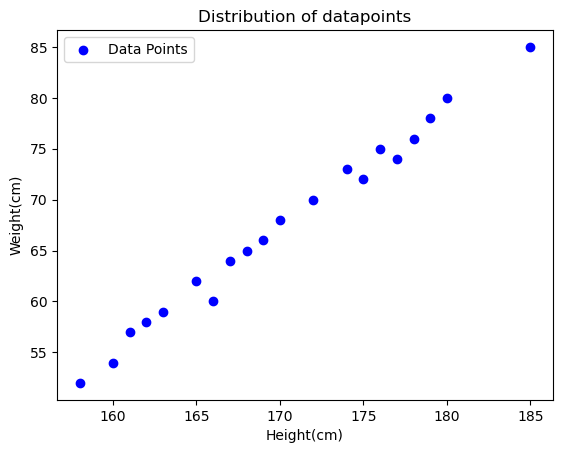

In [51]:
#scatter plot
x = df['Height (cm)'].values
y = df['Weight (kg)'].values

plt.scatter(x, y, color='blue', label='Data Points')
plt.title("Distribution of datapoints")
plt.xlabel("Height(cm)")
plt.ylabel("Weight(cm)")
plt.legend()
plt.show()

In [53]:
df.corr()

,Height (cm),Weight (kg)
Height (cm),1.000000,0.994843
Weight (kg),0.994843,1.000000


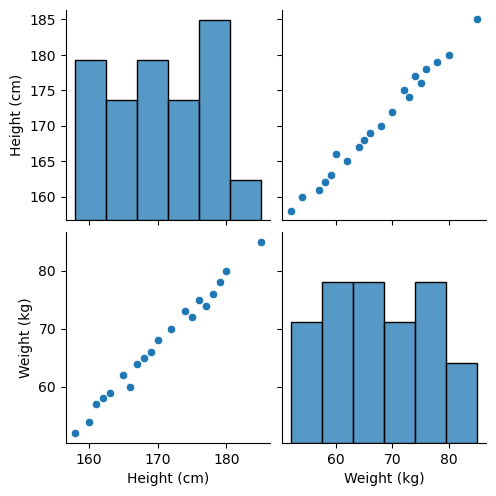

In [55]:
## Seaborn for visualization
sns.pairplot(df)
plt.show()

In [79]:
## Independent features (independent variables are to be converted into DataFrame or 2D-array)
x= df['Weight (kg)']
type(x)

pandas.core.series.Series

In [81]:
x= df[['Weight (kg)']] #conversion into DataFrame
type(x)

pandas.core.frame.DataFrame

In [83]:
np.array(x.shape)

array([20,  1])

In [85]:
##Dependent variable (dependent variable should be in the form of series or 1D-array)
df.shape

(20, 2)

In [93]:
##Train, Test, Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape

(15, 1)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train) #fit_transform is used upon only train data

array([[-0.68032157],
       [-0.90964345],
       [-1.59760909],
       [ 1.15425346],
       [-1.25362627],
       [-1.02430439],
       [ 0.46628782],
       [ 0.6956097 ],
       [-0.45099969],
       [ 1.38357533],
       [ 0.58094876],
       [-0.33633876],
       [ 1.95688003],
       [-0.22167782],
       [ 0.23696594]])

In [108]:
x_test = scaler.transform(x_test)
x_test

C:\Users\Proxy1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-8.79677413],
       [-8.79643721],
       [-8.79641739],
       [-8.79657594],
       [-8.79689304]])

In [110]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [112]:
print("Slope",regression.coef_)
print("Intercept",regression.intercept_)

Slope [1.]
Intercept 1.4210854715202004e-14


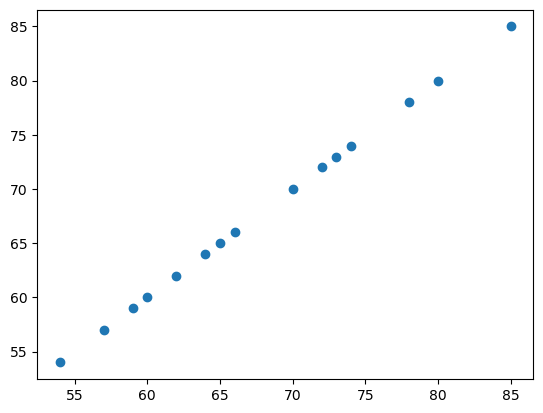

In [114]:
## plot Training data plot best fit line
scatter = plt.scatter(x_train,y_train)
plt.show(scatter)

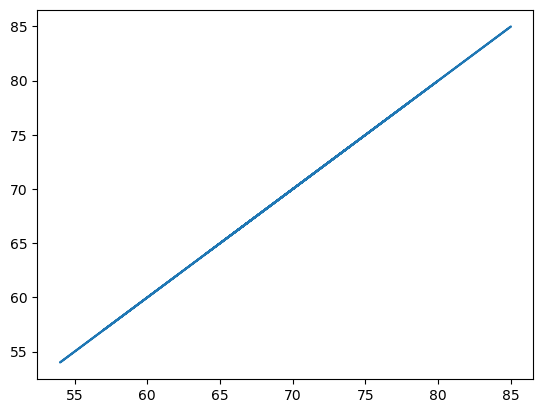

In [124]:
slope_of_best_fit = plt.plot(x_train,regression.predict(x_train))
plt.show(slope_of_best_fit)